 
## Assignmnet 3: Cleaning “Messy” Data

### Author: Mahlet Melese
### Date: June 14, 2023

## 1. Introduction


- The primary objective of this project is to examine fundamental methods for preprocessing and cleansing a messy data in a dataset afflicted with multiple issues related to data integrity and usability.

- The dataset at hand comprises over 12,700 wines, encompassing a total of 16 attributes.

## 2. Exploratory Data Analysis 

#### Import libraries

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#### Read dataset from my github  repo and creat pandas dataframe

In [82]:
# Downloading the csv file from my GitHub repo
data_url = "https://raw.githubusercontent.com/mahletbirku/-DAV-6150/main/M3_Data.csv" 
df = pd.read_csv(data_url, header=0)

# show data with head() function 
df.head(10)

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.20,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.10,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.80,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.80,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.40,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
5,5,7,0,11.3,0.320,0.59,2.20,0.556,37.0,15.0,0.99940,3.20,1.29,15.4,0,11,NaN
6,6,8,0,7.7,0.290,0.40,21.50,0.060,287.0,156.0,0.99572,3.49,1.21,10.3,0,8,NaN
7,7,11,4,6.5,1.220,0.34,1.40,0.040,523.0,551.0,1.03236,3.20,NaN,11.6,1,7,3.0
8,8,12,3,14.8,0.270,1.05,11.25,0.007,213.0,NaN,0.99620,4.93,0.26,15.0,0,6,NaN
9,9,13,6,5.5,0.220,0.39,1.80,0.277,62.0,180.0,0.94724,3.09,0.75,12.6,0,8,4.0


**- This is the first 10 rows of the dataset using the head method. Here, we can have a first look at the features like columns and some of the values that each one takes.**

#### Data Cleaning - Drop the first column

In [83]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,16120,0,5.0,0.790,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,16123,5,8.9,0.470,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,1.20,NaN,-1,8,2.0
12792,16127,4,6.0,0.170,1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,16128,3,7.7,0.320,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0


- Now, the dataframe is ready for further processing 

#### Check the dataset shape

- Knowing the amount of data we have is very important, because the quality of our analysis is depend on that.



In [84]:
# check the result
df.shape

(12795, 16)

####  Description for 16 Attribute 

| Columns| Description |
|:------:|-|
| INDEX |  Unique ID | 
| TARGET | Response Variable (indicates # of cases of wine sold) | 
| AcidIndex|  Measures total acidity of wine via a weighted average| 
| Alcohol| Alcohol Content | 
| Chlorides| Chloride content of the wine | 
| CitricAcid | Citric Acid content of the wine | 
| Density | Density of the wine | 
| FixedAcidity | FixedAcidity of the wine | 
| FreeSulfurDioxide |  Sulfur Dioxide content of the wine | 
| LabelAppeal |  Subjective marketing score that indicates the appeal of
the design of the label on the bottle | 
| ResidualSugar|  Residual sugar content of the wine | 
| STARS|  Wine rating as determined by experts (4 = excellent; 1 =
Poor | 
| Sulphates|  Sulfate content of the wine | 
| TotalSulfurDioxide |  Total sulfur dioxide content of the wine | 
| VolatileAcidity| Volatile acid content of the wine | 
| pH | pH of the wine |

#### Let's get some of the basic statistics of the wine data.

- From the table above, for each feature we can get the mean, standard deviation, count, and other basic information that can tell about the data.

In [85]:
df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


- Here, we get the  summary statistics for all the atributes

- We have 12795 counts, for all the  attributes for the final analysis. 

#### Data types of all columns

- Pandas.dtypes function helps us to display the data types of all columns as a series.



In [86]:
# Check the data types

df.dtypes

INDEX                   int64
TARGET                  int64
FixedAcidity          float64
VolatileAcidity       float64
CitricAcid            float64
ResidualSugar         float64
Chlorides             float64
FreeSulfurDioxide     float64
TotalSulfurDioxide    float64
Density               float64
pH                    float64
Sulphates             float64
Alcohol               float64
LabelAppeal             int64
AcidIndex               int64
STARS                 float64
dtype: object

### Data Visualization

#### Histogram

- A histogram is a value distribution plot of numerical columns. Let's do a histogram of 16 attributes 

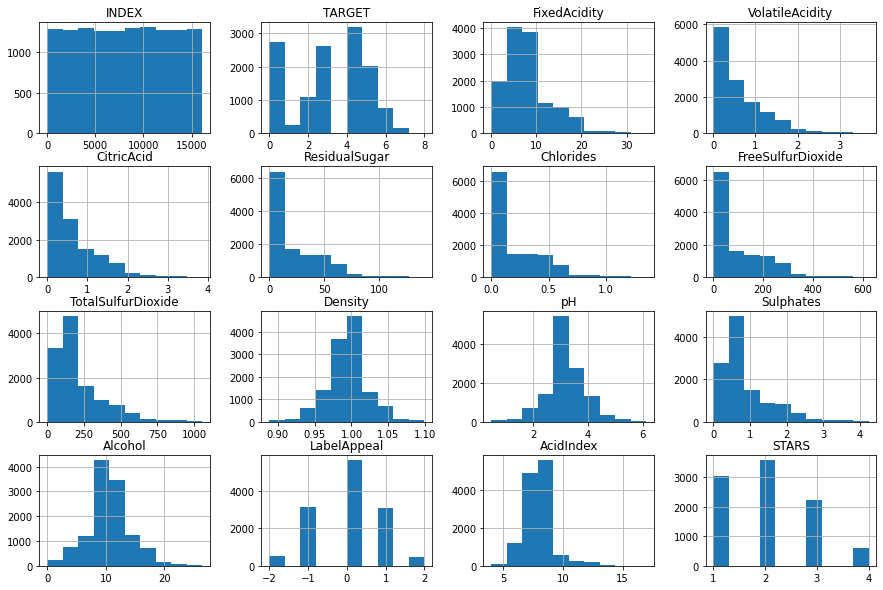

In [87]:
df.hist(bins=10, figsize=(15, 10), layout=(4, 4));


## 3. Data Data Preparation

- Here, I identify any potential data integrity issues (e.g., missing data values; invalid data values; etc.) and  data distribution issues. Once identified the data will be improved before passing it to ML models.

### Data integrity issues


##### Check null values

- I checked null values which is a fundamental part of data cleaning. I will use Pandas. isnull() and .sum() functions together to display count of missing values of each attribute.



In [88]:
print (df.isnull().sum())

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64


- As we can see from the above, there are null values 8 attributes out of the 16. These needs to be adressed before feeding the wine data in to ML models.

##### Check duplicated values

In [89]:
df_dup = df.duplicated()
# check results
df_dup.value_counts()

False    12795
dtype: int64

### Data distribution issues

##### Skweness

- The skew() method calculates the skew for each attribute(column).

- Skewness is a measure of asymmetry of a distribution.

- The result can be between Symmetric, Positively or Right skewed, and Negatively or skewed.



- f the skewness is between -0.5 and 0.5, the data are fairly symmetrical

- If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

- If the skewness is less than -1 or greater than 1, the data are highly skewed

In [90]:
values = df.skew(axis=0)
values

INDEX                -0.003250
TARGET               -0.326378
FixedAcidity          1.174556
VolatileAcidity       1.653366
CitricAcid            1.643195
ResidualSugar         1.469162
Chlorides             1.481147
FreeSulfurDioxide     1.530134
TotalSulfurDioxide    1.611275
Density              -0.018698
pH                    0.044299
Sulphates             1.691810
Alcohol               0.182591
LabelAppeal           0.008431
AcidIndex             1.648883
STARS                 0.447378
dtype: float64

- From, the Histogram plots and the skew values, the attributes are not mostly symetric, rather they are skewed such as  FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides , FreeSulfurDioxide, TotalSulfurDioxide, etc.

- However, LabelAppeal, Alcohol and AcidIndex are fairly symmetrical.


## 3. Data Preparation

### I. Improve data intergrity issue

- Here, I am filling missing/null values with the mean

- I chose mean because, I believe mean is a good representation of the each attribute.

In [91]:
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)
df

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,0.98,54.2,0.567,106.7,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,10.5,-1,7,3.0
2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,1.26,9.4,0.200,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,16120,0,5.0,0.790,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,2.0
12791,16123,5,8.9,0.470,0.29,84.9,0.259,54.0,204.3,0.99518,4.46,1.20,10.5,-1,8,2.0
12792,16127,4,6.0,0.170,1.10,37.0,0.078,25.0,108.0,0.99076,3.25,0.80,12.3,0,6,2.0
12793,16128,3,7.7,0.320,0.12,23.4,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0


- From the above we can see that the missing values in each column are replaced by the mean of each attribute.

### II. Imporve data quality using standardization

- From these analysis, all attributes sould be transformed prior to being used within a machine learning model. I would follow standadization method.

- ML  models highly depends on the quality of the data fed into the model. Thus, data normalization/standadization is a crucial step.

- Standadization method transforms the data into a distribution with a mean of 0 and a standard deviation of 1.

In [92]:
# create a scaler
scaler = StandardScaler()
# fit and transform the data
standardized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

standardized_df


,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,-1.732759,-0.015093,-0.973444,0.933984,0.484644,1.266834,1.512886,0.000189,0.401263,-0.052860,0.183245,-0.404277,-0.176105,0.010175,0.171675,-0.039721
1,-1.732545,-0.015093,-0.713232,-0.865897,0.204107,0.112202,0.891211,-0.870411,0.773025,1.270595,0.257974,-0.227985,-0.006383,-1.112091,-0.583683,1.250193
2,-1.732115,1.023171,-0.192807,3.597807,0.319622,-0.352116,-0.807449,1.018895,-0.392670,0.036828,-0.130615,-0.580569,3.246623,-1.112091,0.171675,1.250193
3,-1.731900,-0.015093,-0.473036,-0.460923,-1.066559,-0.187755,0.891211,-0.803953,-0.562798,0.082802,-1.445838,1.583015,-1.222724,-1.112091,-1.339042,-1.329635
4,-1.731686,0.504039,-0.012661,-0.559917,0.946704,-0.574002,-0.093837,0.572677,-0.606906,0.013841,-0.130615,1.486855,0.898802,0.010175,0.927034,-0.039721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,1.728688,-1.572489,-0.613150,0.268028,2.184365,-0.754798,-0.781181,-0.851423,-0.651013,0.624318,0.272920,-0.436330,-1.590455,1.132440,-2.094401,-0.039721
12791,1.729332,1.023171,0.167486,-0.307934,-0.654005,2.528299,0.164465,-0.500145,-0.000114,0.036828,1.872112,0.573342,-0.006383,-1.112091,0.171675,-0.039721
12792,1.730191,0.504039,-0.412987,-0.847898,0.682669,0.560084,-0.627952,-0.775471,-0.606906,-0.129735,0.063680,-0.067720,0.502783,0.010175,-1.339042,-0.039721
12793,1.730406,-0.015093,-0.072710,-0.577916,-0.934542,0.001259,-0.842473,-0.765977,0.439070,-0.135764,1.139772,-0.356198,0.135052,-1.112091,-1.339042,-0.039721


- Here, we can see that I performed standardization to the wine data.

# 4. Prepped Data Review

### Improved Data distribution issues with the impoved data


### Now, lets visualize the improved data 

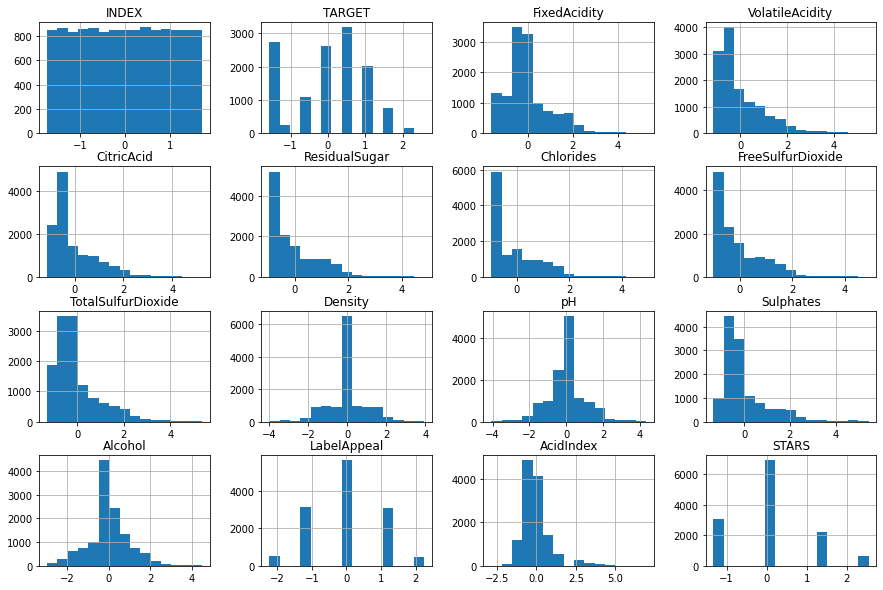

In [93]:
standardized_df.hist(bins=15, figsize=(15, 10), layout=(4, 4));

- The above is the histogram plot for each attribute, we can see that the data is now centered.

#### Let's get some of the basic statistics of the standardized df

- From the table above, for each feature we can get the mean, standard deviation, count, and other basic information that can tell about the data.

In [94]:
standardized_df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,1.279500e+04,1.279500e+04,1.279500e+04,1.279500e+04,1.279500e+04,1.279500e+04,1.279500e+04,1.279500e+04,1.279500e+04,1.279500e+04,1.279500e+04,1.279500e+04,1.279500e+04,1.279500e+04,1.279500e+04,1.279500e+04
mean,-1.451490e-16,-2.995650e-16,1.824080e-16,2.304960e-16,7.729912e-17,-1.221375e-16,-7.767657e-17,4.567678e-17,2.411796e-16,3.171823e-15,-3.347589e-16,2.057665e-16,-1.951177e-16,2.037780e-16,4.938432e-16,2.762596e-16
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.732759e+00,-1.572489e+00,-1.613966e+00,-1.153877e+00,-1.132567e+00,-9.602489e-01,-9.694349e-01,-1.012821e+00,-1.287420e+00,-3.998729e+00,-4.076286e+00,-1.349844e+00,-2.976519e+00,-2.234357e+00,-2.849759e+00,-1.329635e+00
25%,-8.659480e-01,-5.342250e-01,-4.930523e-01,-7.039073e-01,-6.705072e-01,-7.958886e-01,-7.680473e-01,-7.374947e-01,-6.447120e-01,-2.442934e-01,-3.548006e-01,-6.286490e-01,-4.024008e-01,-1.112091e+00,-5.836835e-01,-3.972068e-02
50%,8.593961e-03,-1.509316e-02,-2.128238e-01,-4.159265e-01,-4.064727e-01,-3.767697e-01,-4.440760e-01,-4.336868e-01,-2.792508e-01,1.082587e-02,-1.104897e-02,-3.241446e-01,-6.382687e-03,1.017451e-02,1.716751e-01,-3.972068e-02
75%,8.668155e-01,5.040387e-01,3.476332e-01,4.840138e-01,4.681414e-01,5.683022e-01,5.759957e-01,5.441950e-01,2.941452e-01,2.378707e-01,3.625941e-01,2.528111e-01,4.744965e-01,1.132440e+00,1.716751e-01,-3.972068e-02
max,1.730620e+00,2.580566e+00,5.271648e+00,5.469683e+00,5.237264e+00,4.839616e+00,4.945230e+00,4.901940e+00,5.372796e+00,3.958203e+00,4.368048e+00,5.445413e+00,4.519539e+00,2.254706e+00,6.969902e+00,2.540107e+00


- From the above, we can see that the mean is 0 and standard deviation is 1. The data for each attribute is centered.

### Improved Data integrity issues with the impoved data


##### Check null values

- I checked null values which is a fundamental part of data cleaning. I will use Pandas. isnull() and .sum() functions together to display count of missing values of each attribute.



In [97]:
print (df.isnull().sum())

INDEX                 0
TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64


- From the above, we can see that for the improved data, there is no missing/null values. 

- Now, the data is fully ready to be used for machine learning models.

## 5.Conclusions

- To summarize, in this assignment, I examined, implemented, and tested various data cleaning methods using the provided Wine data. Through this process, I discovered that real-world data is frequently tainted with outliers, missing values, incorrect data types, irrelevant features, or non-standardized data.

- Two prevalent problems arise: data integrity and data distribution issues. It is imperative to address these issues prior to employing machine learning models on the data.

- Having completed all essential pre-processing steps, the data is now prepared in its entirety for utilization in machine learning models.